In [1]:
import cv2
import glob
import numpy as np

images = np.array([cv2.imread(file, 0) for file in glob.glob("data/textures/*.tif")])
images = np.array([cv2.resize(images[i], dsize=(64, 64), interpolation=cv2.INTER_CUBIC)
                   for i in range(len(images))])

images = images.astype(np.float32) / 255
print(images.shape)

(112, 64, 64)


In [2]:
r = images.shape[1] / 2
r2 = r * r

for i in range(images.shape[0]):
    for j in range(images.shape[1]):
        for k in range(images.shape[2]):
            if ((j - r)*(j - r) + (k - r)*(k - r) >= r2):
                images[i,j,k] = 0.0

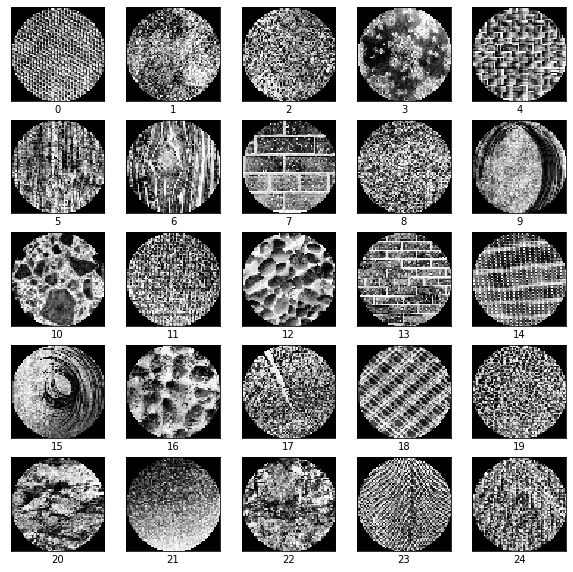

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap='gray')
    plt.xlabel(i)

In [4]:
import math
import pink

som_dim = 6
neuron_dim = int(images.shape[1] / math.sqrt(2.0) * 2.0)

np_som = np.random.rand(som_dim, som_dim, neuron_dim, neuron_dim).astype(np.float32)
som = pink.som(np_som)

data = [pink.data(images[i]) for i in range(len(images))]

trainer = pink.trainer(som, pink.GaussianFunctor(1.1, 0.2),
                       number_of_rotations=180)

In [5]:
from tqdm import tqdm_notebook

for iter in tqdm_notebook(range(1000), desc="epoch"):
    #for i in tqdm_notebook(range(len(images)), desc="train", leave=False):
    for i in range(len(images)):
        trainer(data[i])

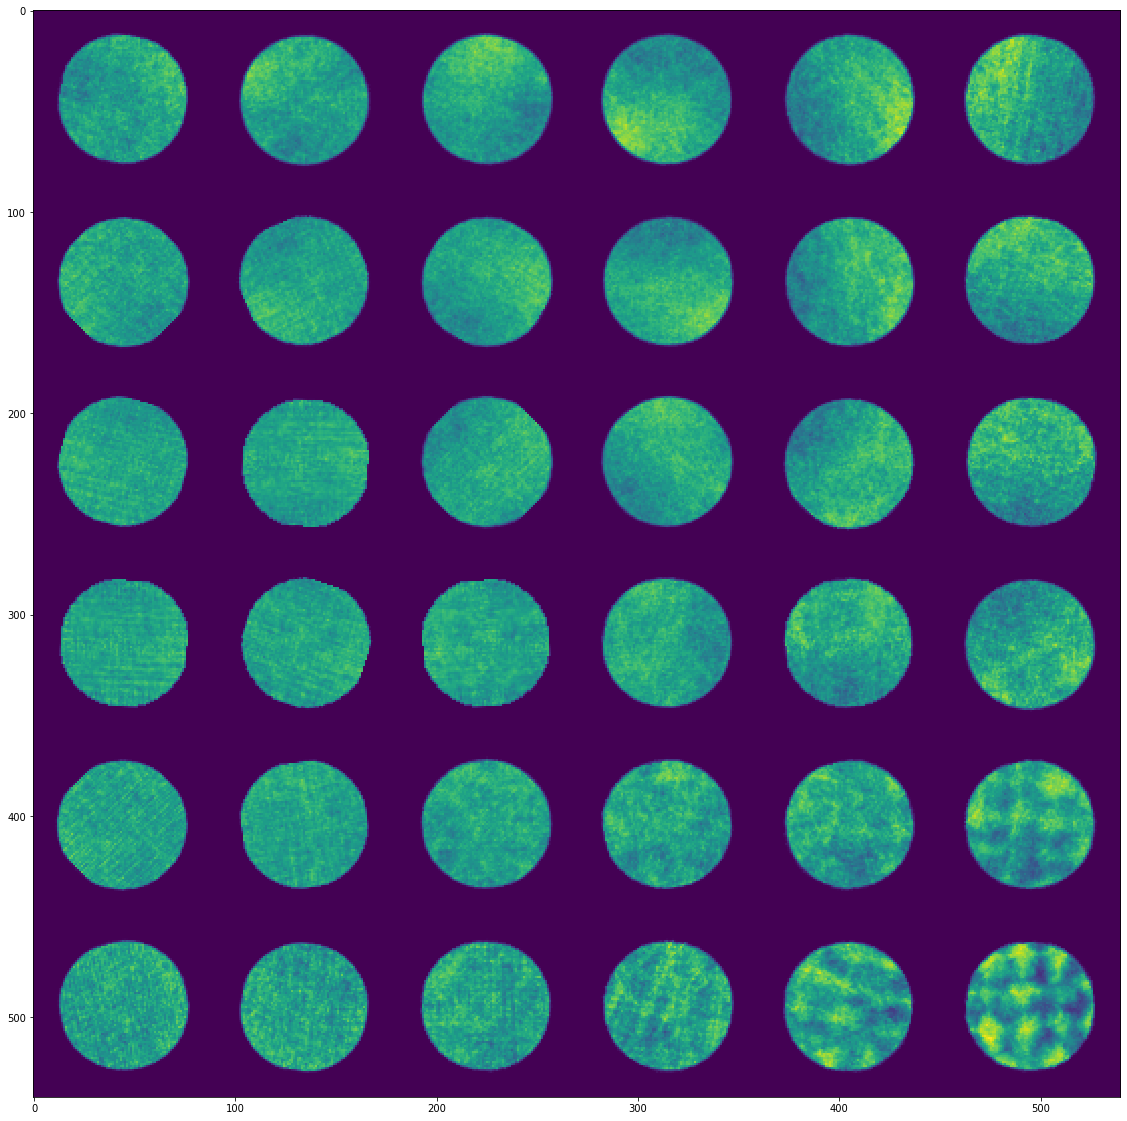

In [6]:
trainer.update_som()
np_som = np.array(som, copy=True)

plt.figure(figsize=(20,20))
plt.imshow(np_som.swapaxes(1, 2).reshape((som_dim * neuron_dim, som_dim * neuron_dim)))
plt.grid(False)